In [96]:
import pandas as pd #data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
from sklearn.preprocessing import LabelEncoder
import pickle
%matplotlib inline
# To show all rows of pandas datafram
pd.set_option('display.max_rows',None)

In [49]:
df=pd.read_csv('drugsComTrain_raw.tsv',sep='\t')

In [50]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.""",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.""",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch""",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin.""",9.0,"November 27, 2016",37


In [51]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                             9069 
Pain                                                                   6145 
Anxiety                                                                5904 
Acne                                                                   5588 
Bipolar Disorde                                                        4224 
Insomnia                                                               3673 
Weight Loss                                                            3609 
Obesity                                                                3568 
ADHD                                                                   3383 
Diabetes, Type 2                                                       2554 
Emergency Contraception                                                2463 
High Blood Pressure                                               

In [52]:
df_train=df[(df['condition']=='Birth Control')|(df['condition']=='Depression')|(df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [53]:
df.shape

(161297, 7)

In [54]:
df_train.shape

(42732, 7)

In [55]:
df_train.sample(3)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
103024,94867,Abilify,Depression,"""5mg dose; used with Zoloft (50mg). Not too many side effects for me. Some dizziness when getting up and slightly blurred vision immediately upon standing. Mild problems with dehydration, but that is only because I have been spending a lot of time outside this summer. All of these side effects seem to have gotten better over time. I have been on it for about 4 weeks.""",8.0,"August 21, 2012",31
126061,79655,Insulin glargine,"Diabetes, Type 2","""Toujeo Solostar was a vast improvement over the old insulin, the best part is the needles. The only thing that sucks, province of Ontario does not approve it. I wish they would get their act together. I am a senior and I have to pay for this type of insulin. I may have to change back to the old insulin soon unless Ontario Government approves it.""",9.0,"February 12, 2017",3
24551,178658,Victoza,"Diabetes, Type 2","""I started Victoza today. At only 0.6 mg. I felt so undeniably and utterly unwell that I cannot imagine even trying it for a second day. \r\n\r\n In summary, severe low blood sugar symptoms, ravenously hungry and I was also prescribe this for weight loss as well as diabetes, headache, no energy, and a general feeling of being very not well. \r\n\r\nIn short I do not recommend this to anyone.""",1.0,"February 7, 2017",7


In [56]:
X=df_train.drop(columns=['Unnamed: 0','drugName','rating','date','usefulCount'])

In [57]:
X.head()

,condition,review
2,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."""
3,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"""
9,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."""
11,Depression,"""I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."""
14,Birth Control,"""Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."""


In [58]:
X.condition.value_counts()

condition
Birth Control          28788
Depression             9069 
Diabetes, Type 2       2554 
High Blood Pressure    2321 
Name: count, dtype: int64

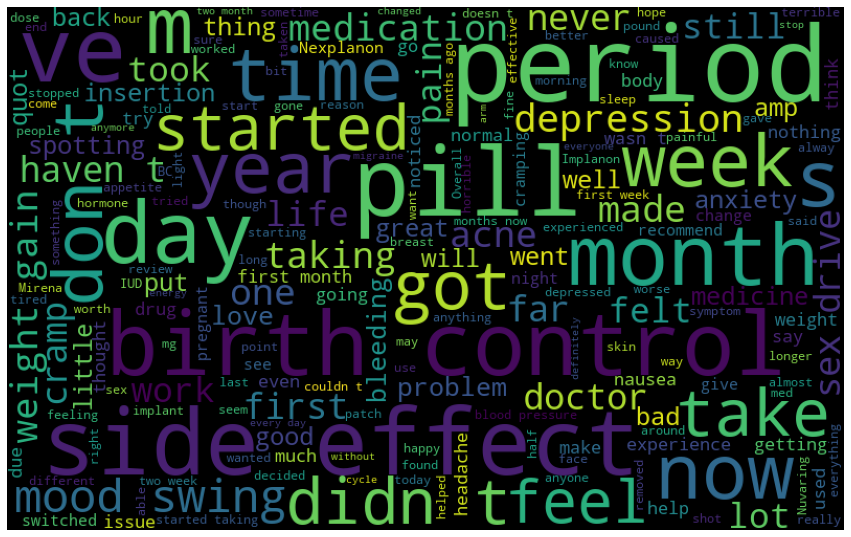

In [59]:
plt.figure(figsize=(15,20))
all_cond=' '.join([sentence for sentence in X['review']])
wordcloud_all=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_cond)
plt.imshow(wordcloud_all)
plt.axis('off')
plt.show()

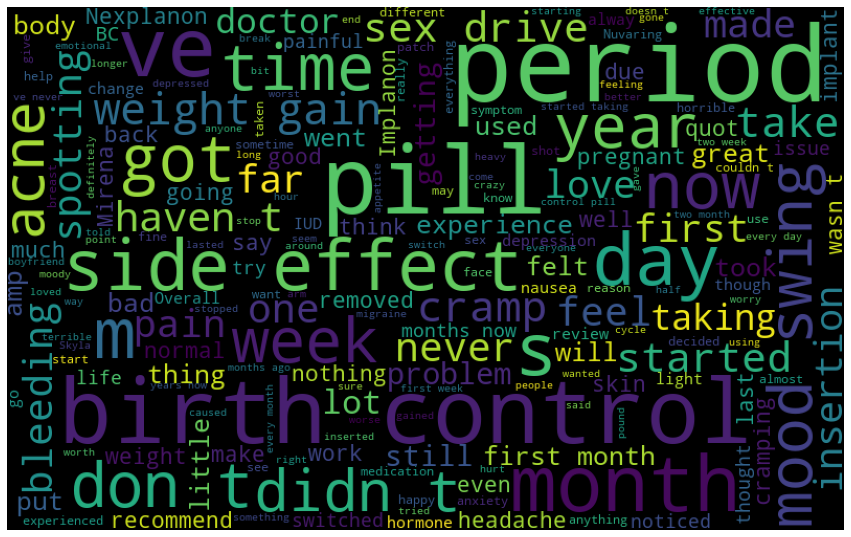

In [60]:
plt.figure(figsize=(15,20))
bi_words=' '.join([sentence for sentence in X['review'][X['condition']=='Birth Control']])
wordcloud_bi=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(bi_words)
plt.imshow(wordcloud_bi)
plt.axis('off')
plt.show()

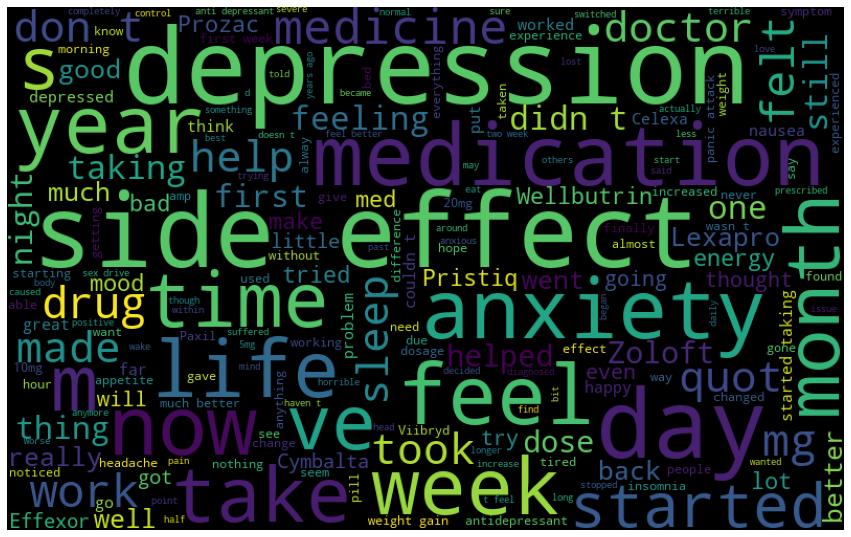

In [61]:
plt.figure(figsize=(15,20))
de_words=' '.join(X['review'][X['condition']=='Depression'].tolist())
wordcloud_de=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(de_words)
plt.imshow(wordcloud_de)
plt.axis('off')
plt.show()

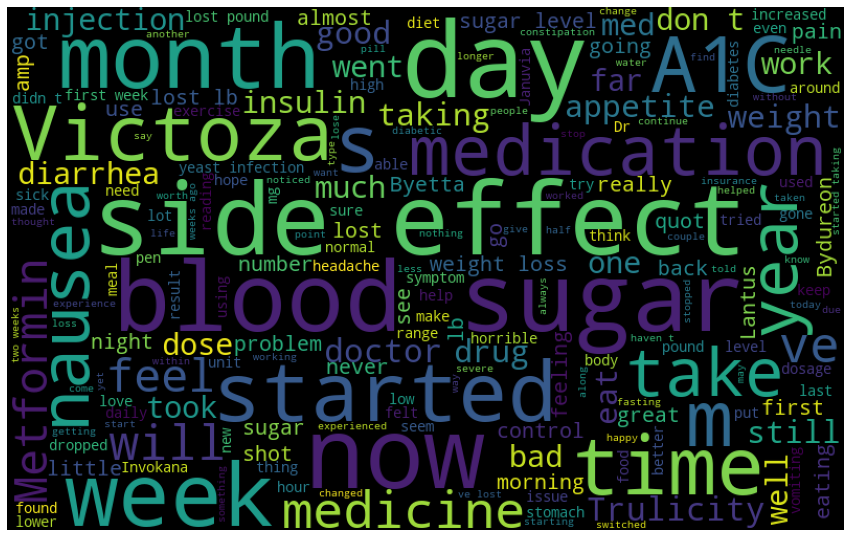

In [62]:
plt.figure(figsize=(15,20))
dia_words=' '.join(X['review'][X['condition']=='Diabetes, Type 2'].tolist())
wordcloud_dia=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(dia_words)
plt.imshow(wordcloud_dia)
plt.axis('off')
plt.show()

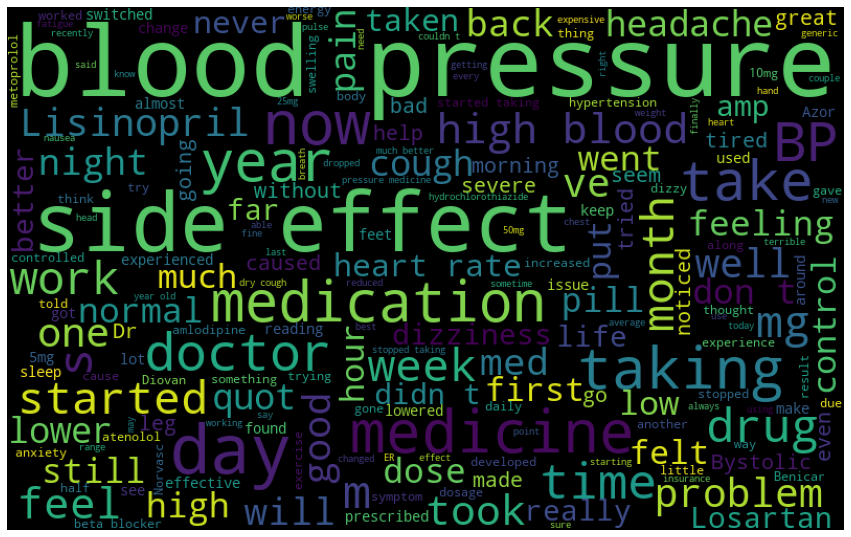

In [63]:
plt.figure(figsize=(15,20))
word_high=' '.join(X['review'][X['condition']=='High Blood Pressure'].tolist())
wordcloud_high=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(word_high)
plt.imshow(wordcloud_high)
plt.axis('off')
plt.show()

In [64]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [65]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [66]:
for i,col in enumerate(X.columns):
    X.iloc[:,i]=X.iloc[:,i].str.replace('"','')

In [67]:
# To set the width of the column to maximum
pd.set_option('max_colwidth',1)

In [68]:
X.head()

,condition,review
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger."
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."
14,Birth Control,"Started Nexplanon 2 months ago because I have a minimal amount of contraception&#039;s I can take due to my inability to take the hormone that is used in most birth controls. I&#039;m trying to give it time because it is one of my only options right now. But honestly if I had options I&#039;d get it removed.\r\nI&#039;ve never had acne problems in my life, and immediately broke out after getting it implanted. Sex drive is completely gone, and I used to have sex with my boyfriend a few days a week, now its completely forced and not even fun for me anymore. I mean I&#039;m on birth control because I like having sex but don&#039;t want to get pregnant, why take a birth control that takes away sex? Very unhappy and hope that I get it back with time or I&#039;m getting it removed."


In [69]:
stop=stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [70]:
porter=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [71]:
print(porter.stem('sportingly'))
print(porter.stem('very'))
print(porter.stem('troubled'))

sportingli
veri
troubl


In [72]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\power\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
print(lemmatizer.lemmatize('sportingly'))
print(lemmatizer.lemmatize('very'))
print(lemmatizer.lemmatize('troubled'))

sportingly
very
troubled


In [74]:
def review_to_words(raw_review):
    pattern=re.compile('[<>[^+]]')
    review_text=pattern.sub('',raw_review)
    letters_only=re.sub('[^A-Za-z]',' ',review_text)
    letters_only2=re.sub('\s[A-Za-z]\s',' ',letters_only)
    letters_only3=re.sub('\s',' ',letters_only2)
    words=letters_only.lower().split()
    meaningful_words=[w for w in words if not w in stop]
    lemmatize_words=[lemmatizer.lemmatize(w) for w in meaningful_words]
    return ' '.join(lemmatize_words)

In [75]:
X['clean_review']=X['review'].apply(review_to_words)

In [76]:
X.head()

,condition,review,clean_review
2,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
9,Birth Control,"I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.",pill many year doctor changed rx chateal effective really help completely clearing acne take month though gain extra weight develop emotional health issue stopped taking bc started using natural method birth control started take bc hate acne came back age really hope symptom like depression weight gain begin affect older also naturally moody may worsen thing negative mental rut today also hope push edge believe depressed hopefully like younger
11,Depression,"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.",taken anti depressant year improvement mostly moderate severe side affect make go take cymbalta mostly pain began deplin noticed major improvement overnight energy better disposition sinking low low major depression taking month feel like normal person first time ever best thing side effect
14,Birth Control,"Started Nexplanon 2 months ago because I have a minim

In [77]:
X['condition'].value_counts()

condition
Birth Control          28788
Depression             9069 
Diabetes, Type 2       2554 
High Blood Pressure    2321 
Name: count, dtype: int64

In [78]:
le=LabelEncoder()
X['condition']=le.fit_transform(X['condition'])

In [79]:
X['condition'].value_counts()

condition
0    28788
1    9069 
2    2554 
3    2321 
Name: count, dtype: int64

In [80]:
X_feat=X['clean_review']
y=X['condition']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_feat,y,test_size=0.2,random_state=0,stratify=y)

In [82]:
count_vectorizer=CountVectorizer(stop_words='english')
count_train=count_vectorizer.fit_transform(X_train)
count_test=count_vectorizer.transform(X_test)

In [83]:
count_train

<34185x16012 sparse matrix of type '<class 'numpy.int64'>'
	with 1096348 stored elements in Compressed Sparse Row format>

In [84]:
model=MultinomialNB()
model.fit(count_train,y_train)

MultinomialNB()

In [85]:
y_pred=model.predict(count_test)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [86]:
y_test[:5]

128569    0
53854     0
152032    1
99472     0
122206    0
Name: condition, dtype: int32

In [87]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5766
           1       0.96      0.95      0.95      1844
           2       0.90      0.93      0.91       499
           3       0.86      0.91      0.88       438

    accuracy                           0.97      8547
   macro avg       0.93      0.94      0.94      8547
weighted avg       0.97      0.97      0.97      8547



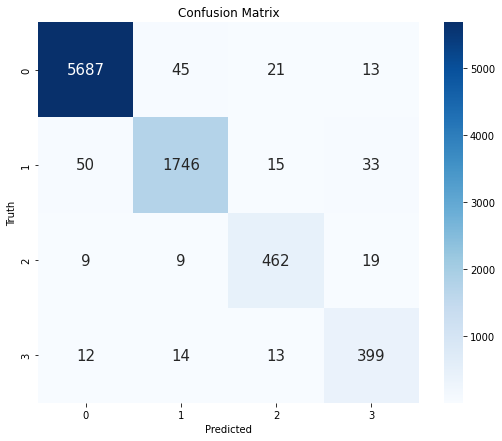

In [88]:
plt.figure(figsize=(9,7))
sns.heatmap(metrics.confusion_matrix(y_pred,y_test),annot=True,cbar=True,square=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [89]:
X.tail()

,condition,review,clean_review
161273,0,"I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is.. I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.",nexplanon since dec got first period end january lasted month half march bleed close three week started bleeding march th bleeding every since gained lb far since getting birth control although weight gain deal breaker bleeding trying patient see body adjusts implant three month far finger crossed cycle go away awhile
161278,2,I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me,got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine
161286,1,"This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap
161290,3,"I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation
161291,0,"This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(",would second month junel birth control year changed due spotting increased mood swing previous birth control since switch shorter period day gained major weight increased appetite switched regular exercise routine still managed drop extra lb


In [92]:
text=['would second month junel birth control year changed due spotting increased mood swing previous birth control since switch shorter period day gained major weight increased appetite switched regular exercise routine still managed drop extra lb']
text_count=count_vectorizer.transform(text)
y_predict=model.predict(text_count)
if y_predict==0:
    print('Birth Control')
elif y_predict==1:
    print('Depression')
elif y_predict==2:
    print('Diabetes, Type 2')
else:
    print('High Blood Pressure')

Birth Control


In [99]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(count_vectorizer,open('count_vectorizer.pkl','wb'))